In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("../../../pynoddy/")

import pynoddy
import pynoddy.history
import pynoddy.output
import pynoddy.events
import pynoddy.experiment

import importlib

In [2]:
history = "ch4_model.his"
output = "ch4_model_out"

In [3]:
cs = 25
extent = (3000, 200, 2000)

In [4]:
nm = pynoddy.history.NoddyHistory()
# set model extent
nm.set_extent(extent[0],extent[1],extent[2])
# set model origin x,y,z
nm.set_origin(0., 0., extent[2])
# set model cube size
nm.change_cube_size(cs)

# stratigraphic event
strati_options = {
    'num_layers' : 5,
    'layer_names' : ['5','4','3','2','1'],
    'layer_thickness' : [350,200,200,200,200]
}
nm.add_event('stratigraphy', strati_options)

# fold event
fold_options = {
    "name": "fold1",
    "pos": (500,0,1000),
    "wavelength": 4000.,
    "amplitude": 400
}
nm.add_event("fold", fold_options)

# write history file
nm.write_history(history)

In [ ]:
nm

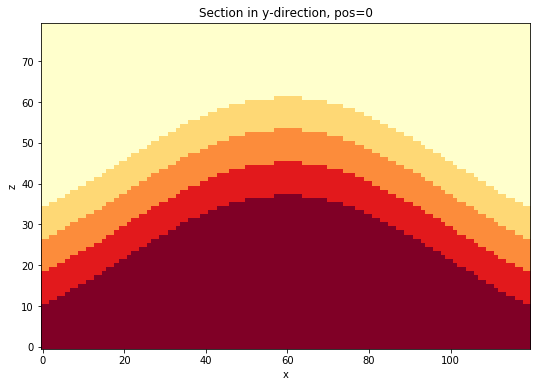

In [5]:
ex = pynoddy.experiment.Experiment(history)
ex.plot_section()

In [12]:
pynoddy.compute_model(history, 'model')

''

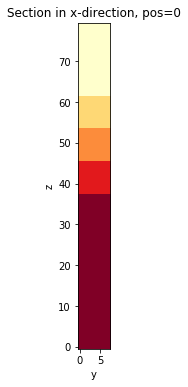

In [7]:
ex.plot_section(direction="x")

In [16]:
ex.basename = 'model'
ex.load_geology()

AttributeError: 'Experiment' object has no attribute 'nx'

In [18]:
ex.get_drillhole_data(5,5, resolution=2000/500)

array([ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2

In [17]:
ex.origin_z, ex.extent_z, 2000/500, ex.extent_x

(2000.0, 2000.0, 4.0, 3000.0)

In [7]:
sys.path.append("../..")
import gempy as gp

04:22:14 WARNING:Using NumPy C-API based implementation for BLAS functions.


In [8]:
# initialize geo_data object
geo_data = gp.create_data([0, extent[0], 
                           0, extent[1], 
                           0, extent[2]],
                          resolution=[int(extent[0]/cs), 
                                      int(extent[1]/cs), 
                                      int(extent[2]/cs)])

In [9]:
x = [250,750,500]
y = [0,100,200]
layers = [2,3,4,5]

for l in layers:
    i_df = ex.export_interfaces_gempy(x,y, layer=l, group_id="l"+str(l)+"_a")
    gp.set_interfaces(geo_data, i_df, append=True)

In [33]:
x = [2750,2250,2500]
y = [0,100,200]
layers = [2,3,4,5]

for l in layers:
    i_df = ex.export_interfaces_gempy(x,y, layer=l, group_id="l"+str(l)+"_b")
    gp.set_interfaces(geo_data, i_df, append=True)

In [14]:
i_df.dtypes, geo_data.interfaces.dtypes

(X                    float64
 Y                    float64
 Z                    float64
 formation           category
 series              category
 X_std                 object
 Y_std                 object
 Z_std                 object
 group_id              object
 formation_number       int64
 isFault              float64
 order_series           int64
 dtype: object, X                    float64
 X_std                 object
 Y                    float64
 Y_std                 object
 Z                    float64
 Z_std                 object
 annotations           object
 formation           category
 formation_number       int64
 formation_value        int64
 group_id              object
 isFault                 bool
 order_series           int64
 series              category
 dtype: object)

<IPython.core.display.Javascript object>


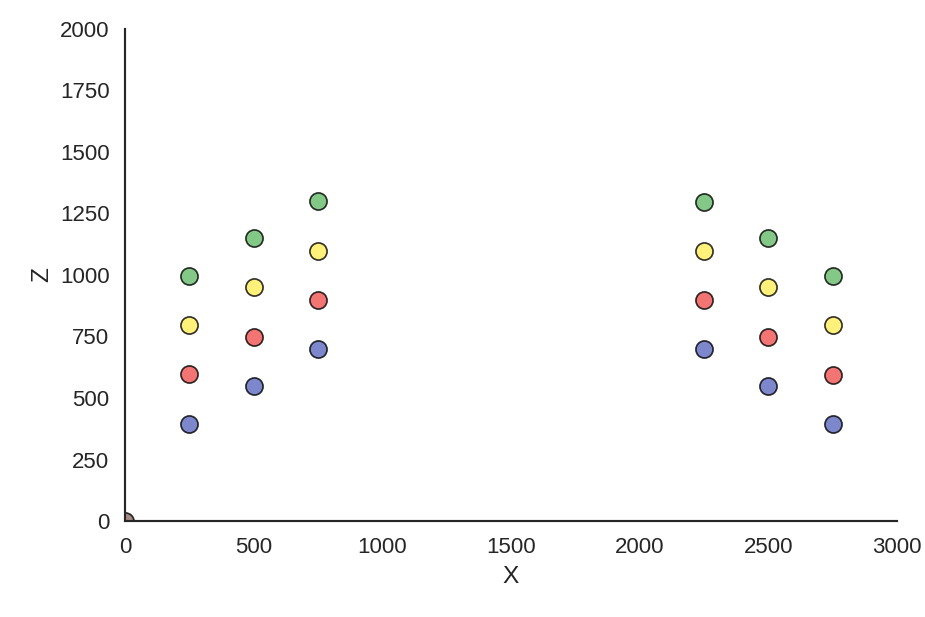

In [35]:
%matplotlib notebook
gp.plotting.plot_data(geo_data)

In [14]:
geo_data.interfaces[['X', 'Y', 'Z']] =  geo_data.interfaces[['X', 'Y', 'Z']].astype('float')

In [37]:
geo_data.update_df()

In [38]:
gp.get_data(geo_data, 'interfaces')

,X,Y,Z,formation,series,formation_number,order_series,isFault
0,250.0,0.0,396.0,Layer 5,Default series,1,1,False
24,2500.0,200.0,549.0,Layer 5,Default series,1,1,False
23,2250.0,100.0,698.0,Layer 5,Default series,1,1,False
22,2750.0,0.0,395.0,Layer 5,Default series,1,1,False
18,750.0,100.0,699.0,Layer 5,Default series,1,1,False
19,500.0,200.0,549.0,Layer 5,Default series,1,1,False
8,2750.0,0.0,595.0,Layer 4,Default series,2,1,False
15,250.0,0.0,596.0,Layer 4,Default series,2,1,False
16,750.0,100.0,899.0,Layer 4,Default series,2,1,False
17,500.0,200.0,749.0,Layer 4,Default series,2,1,False


In [20]:
geo_data.interfaces.dtypes

X                    float64
X_std                 object
Y                    float64
Y_std                 object
Z                    float64
Z_std                 object
annotations           object
formation           category
formation_number       int64
formation_value        int64
group_id              object
isFault                 bool
order_series           int64
series              category
dtype: object

In [39]:
indices = np.array([[0, 19, 18],
                    [22,23,24]
                   ])

In [40]:
gp.set_orientation_from_interfaces(geo_data, indices)

,X,Y,Z,G_x,G_y,G_z,dip,azimuth,polarity,formation,series,formation_number,order_series,isFault,annotations,formation_value
0,500.0,100.0,548.000000,-0.516992,-0.008559,0.855947,31.135451,269.051481,1.0,Layer 5,Default series,1,1,False,"${\bf{x}}_{\beta \,{\bf{1}},0}$",1
1,2500.0,100.0,547.333333,0.516122,-0.014273,0.856396,31.085652,91.584103,1.0,Layer 5,Default series,1,1,False,"${\bf{x}}_{\beta \,{\bf{1}},1}$",1


In [26]:
geo_data.orientations[(geo_data.orientations['G_x'] > 0).values * (geo_data.orientations['G_y'] < 0).values]

,X,Y,Z,G_x,G_y,G_z,dip,azimuth,polarity,formation,series,formation_number,order_series,isFault,annotations,formation_value


In [20]:
gp.set_orientation_from_interfaces(geo_data, [22,23,24])

,X,Y,Z,G_x,G_y,G_z,dip,azimuth,polarity,formation,series,formation_number,order_series,isFault,annotations,formation_value
0,500.0,100.0,548.000000,-0.516992,-0.008559,0.855947,31.135451,269.051481,1.0,Layer 5,Default series,1,1,False,"${\bf{x}}_{\beta \,{\bf{1}},0}$",1
1,2500.0,100.0,547.333333,0.516122,-0.014273,0.856396,31.085652,91.584103,1.0,Layer 5,Default series,1,1,False,"${\bf{x}}_{\beta \,{\bf{1}},1}$",1


In [54]:
np.rad2deg(np.arctan(np.deg2rad(0.51)/np.deg2rad(-0.014)))

-88.427569572326661

In [21]:
geo_data.calculate_orientations()

In [22]:
geo_data.calculate_gradient()
gp.get_data(geo_data, 'orientations')

,X,Y,Z,G_x,G_y,G_z,dip,azimuth,polarity,formation,series,formation_number,order_series,isFault
0,500.0,100.0,548.000000,-0.516992,-0.008559,0.855947,31.135451,269.051481,1.0,Layer 5,Default series,1,1,False
1,2500.0,100.0,547.333333,0.516122,-0.014273,0.856396,31.085652,91.584103,1.0,Layer 5,Default series,1,1,False


,X,Y,Z,G_x,G_y,G_z,dip,azimuth,polarity,formation,series,formation_number,order_series,isFault
0,500,100,548,0.516992,0.008559,0.855947,31.135451,89.051481,1,Layer 5,Default series,1,1,False


In [49]:
gp.get_data(geo_data, 'orientations')

,X,Y,Z,G_x,G_y,G_z,dip,azimuth,polarity,formation,series,formation_number,order_series,isFault
0,500.0,100.0,548.000000,0.516992,0.008559,0.855947,31.135451,89.051481,1.0,Layer 5,Default series,1,1,False
1,2500.0,100.0,547.333333,-0.516122,0.014273,0.856396,31.085652,-88.415897,1.0,Layer 5,Default series,1,1,False


In [34]:
def get_orientation(normal):
    """Get orientation (dip, azimuth, polarity ) for points in all point set"""
    #    if "normal" not in dir(self):
    #        self.plane_fit()

    # calculate dip
    dip = np.arccos(normal[2]) / np.pi * 180.

    # calculate dip direction
    # +/+
    if normal[0] >= 0 and normal[1] > 0:
        dip_direction = np.arctan(normal[0] / normal[1]) / np.pi * 180.
    # border cases where arctan not defined:
    elif normal[0] > 0 and normal[1] == 0:
        dip_direction = 90
    elif normal[0] < 0 and normal[1] == 0:
        dip_direction = 270
    # +-/-
    elif normal[1] < 0:
        dip_direction = 180 + np.arctan(normal[0] / normal[1]) / np.pi * 180.
    # -/-
    elif normal[0] < 0 and normal[1] >= 0:
        dip_direction = 360 + np.arctan(normal[0] / normal[1]) / np.pi * 180.
    # if dip is just straight up vertical
    elif normal[0] == 0 and normal[1] == 0:
        dip_direction = 0

    if -90 < dip < 90:
        polarity = 1
    else:
        polarity = -1

    return dip, dip_direction, polarity

In [41]:
get_orientation(geo_data.orientations[['G_x', 'G_y', 'G_z']].values)

NameError: name 'get_orientation' is not defined

In [38]:
geo_data.orientations[['G_x', 'G_y', 'G_z']].values

array([[ 0.51699218,  0.00855947,  0.85594732],
       [-0.51612157,  0.01427327,  0.8563964 ]])

In [47]:
geo_data.create_orientation_from_interfaces([0, 19, 18])

array([  5.00000000e+02,   1.00000000e+02,   5.48000000e+02,
         3.11354510e+01,   2.69051481e+02,   1.00000000e+00,
        -5.16992183e-01,  -8.55947322e-03,   8.55947322e-01])

In [24]:
gp.get_data(geo_data, 'orientations')

,X,Y,Z,G_x,G_y,G_z,dip,azimuth,polarity,formation,series,formation_number,order_series,isFault
0,500,100,548,-0.516992,-0.008559,0.855947,31.135451,89.051481,1,Layer 5,Default series,1,1,False


In [16]:
group_ids = ["l2_a", "l2_b"]
group_obj = []
for gid in group_ids:
    group_obj.append(gp.DataManagement.DataPlane(geo_data, 
                                                 gid, 
                                                 "interf_to_fol"))
for go in group_obj:
    go.set_fol()

AttributeError: module 'gempy' has no attribute 'DataManagement'

In [21]:
gp.plotting.plot_data_3D(geo_data)

holding... Use vtk.resume to go back to the interactive window


In [21]:
geo_data.set_formation_number()
geo_data.order_table()

../../gempy/gempy_front.py:927: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  warnings.warn("gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead", FutureWarning)


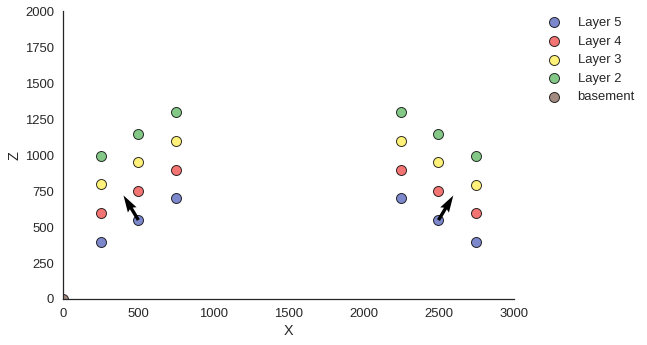

In [42]:
%matplotlib inline
gp.plot_data(geo_data, direction='y')

../../gempy/gempy_front.py:927: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  warnings.warn("gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead", FutureWarning)


<IPython.core.display.Javascript object>


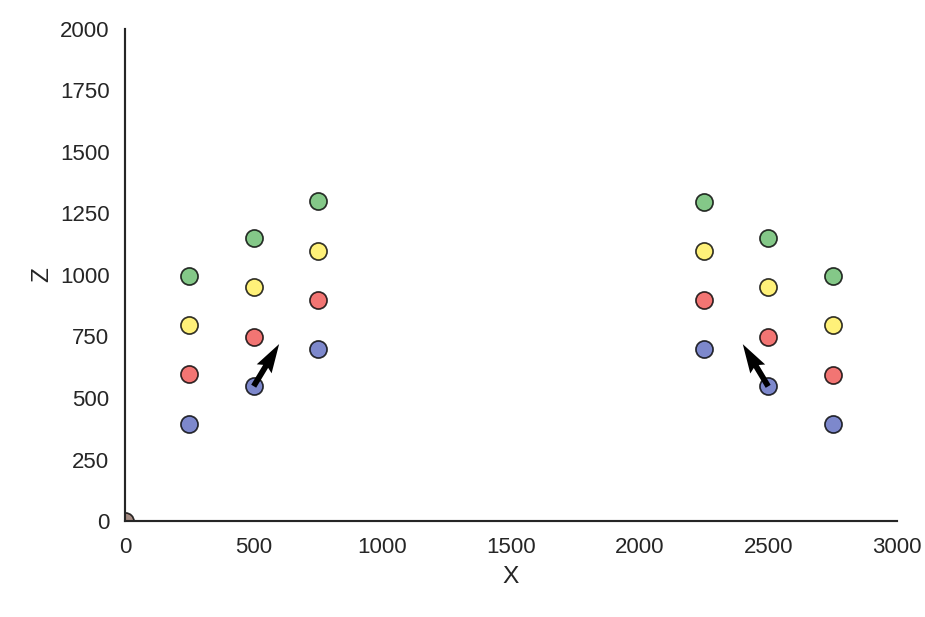

In [48]:
gp.plot_data(geo_data)

In [ ]:
interp_data = gp.InterpolatorInput(geo_data, u_grade=[3])

In [ ]:
sol_example = gp.compute_model(interp_data)

In [ ]:
gp.plot_section(geo_data, sol_example[0,0,:], 1, plot_data = True)

In [35]:
geo_data.import_data_csv

In [26]:
geo_data.interfaces.to_csv("../Tutorial/data/tutorial_ch4_interfaces")

In [27]:
geo_data.foliations.to_csv("../Tutorial/data/tutorial_ch4_foliations")